In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras 
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten , BatchNormalization
from keras.layers import Conv2D, MaxPooling2D , AveragePooling2D,GlobalAveragePooling2D
from keras import models, layers
from keras.layers import LSTM,TimeDistributed
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_path = "/Users/phongminh/IE103Lab/Data_Malware/Data_Train"
val_path = "/Users/phongminh/IE103Lab/Data_Malware/Data_Val"
test_path = "/Users/phongminh/IE103Lab/Data_Malware/Data_Test"

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed=123,
    shuffle=True,
    image_size=(224,224),
    batch_size=32
)

Found 2582 files belonging to 2 classes.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    seed=123,
    shuffle=True,
    image_size=(224,224),
    batch_size=32
)

Found 310 files belonging to 2 classes.


In [5]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    seed=123,
    shuffle=True,
    image_size=(224,224),
    batch_size=32
)

Found 310 files belonging to 2 classes.


In [8]:
def malware_model(width, height):
    Malware_model = Sequential()

    Malware_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(width, height, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    Malware_model.add(BatchNormalization())
    Malware_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    Malware_model.add(BatchNormalization())
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))

    Malware_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    Malware_model.add(BatchNormalization())
    Malware_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    Malware_model.add(BatchNormalization())
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))

    Malware_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    Malware_model.add(BatchNormalization())
    Malware_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    Malware_model.add(BatchNormalization())
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))

    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Dense(1, activation='sigmoid'))

    Malware_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer='adam', metrics=['accuracy'])

    return Malware_model


In [9]:
model=malware_model(224 , 224)

In [10]:
datagen = ImageDataGenerator(rotation_range=10,  
                         zoom_range = 0.1, 
                         width_shift_range=0.1,  
                         height_shift_range=0.1, 
                         rescale=1.0/255.0)

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
augmented_train_ds = datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=64,
    class_mode='binary'
)

augmented_val_ds = datagen.flow_from_directory(
    val_path,
    target_size=(224,224),
    batch_size=64,
    class_mode='binary'
)

augmented_test_ds = datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=64,
    class_mode='binary'
)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Found 2582 images belonging to 2 classes.
Found 310 images belonging to 2 classes.
Found 310 images belonging to 2 classes.


In [15]:
model_fit = model.fit(augmented_train_ds, epochs=25, batch_size=128, validation_data=augmented_train_ds, callbacks=[early_stopping], verbose=1)

Epoch 1/25


2023-05-26 22:44:22.610643: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


41/41 [==============================] - ETA: 0s - loss: 6.5777 - accuracy: 0.5449 

2023-05-26 22:51:54.210289: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


41/41 [==============================] - 562s 14s/step - loss: 6.5777 - accuracy: 0.5449 - val_loss: 84.9648 - val_accuracy: 0.4729
Epoch 2/25
41/41 [==============================] - 545s 13s/step - loss: 0.7661 - accuracy: 0.5256 - val_loss: 1.0805 - val_accuracy: 0.4779
Epoch 3/25
41/41 [==============================] - 555s 14s/step - loss: 0.6987 - accuracy: 0.5271 - val_loss: 1.1929 - val_accuracy: 0.4667
Epoch 4/25
41/41 [==============================] - 554s 14s/step - loss: 0.6965 - accuracy: 0.5294 - val_loss: 4.9749 - val_accuracy: 0.4675
Epoch 5/25
41/41 [==============================] - 579s 14s/step - loss: 0.6956 - accuracy: 0.5337 - val_loss: 0.7159 - val_accuracy: 0.4888
Epoch 6/25
41/41 [==============================] - 543s 13s/step - loss: 0.6824 - accuracy: 0.5294 - val_loss: 0.6926 - val_accuracy: 0.5302
Epoch 7/25
41/41 [==============================] - 510s 12s/step - loss: 0.6758 - accuracy: 0.5287 - val_loss: 0.6923 - val_accuracy: 0.5279
Epoch 8/25
41/41

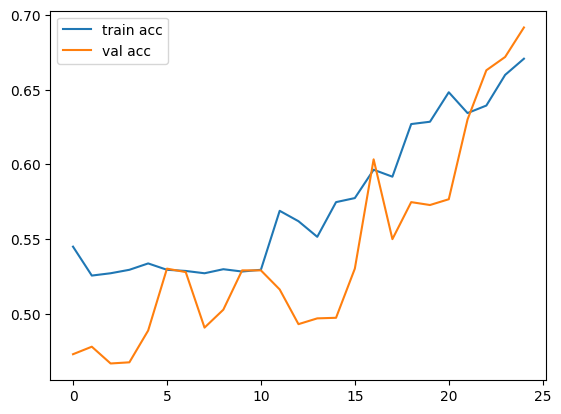

In [16]:
# plot the accuracy
plt.plot(model_fit.history['accuracy'], label='train acc')
plt.plot(model_fit.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.close()

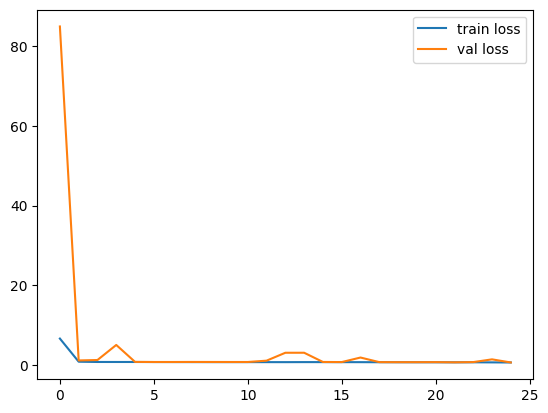

In [17]:
# plot the loss
plt.plot(model_fit.history['loss'], label='train loss')
plt.plot(model_fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.close()

In [18]:
from sklearn.metrics import classification_report

y_pred = model.predict(augmented_test_ds)
y_pred_labels = np.round(y_pred).astype(int)
y_true = np.concatenate([y for _, y in test_ds], axis=0)
report = classification_report(y_true, y_pred_labels)

print(report)

2023-05-27 02:45:24.867404: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - 14s 3s/step
              precision    recall  f1-score   support

           0       0.52      0.50      0.51       150
           1       0.55      0.56      0.55       160

    accuracy                           0.53       310
   macro avg       0.53      0.53      0.53       310
weighted avg       0.53      0.53      0.53       310



2023-05-27 02:45:39.125838: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [310]
	 [[{{node Placeholder/_4}}]]
2023-05-27 02:45:39.126261: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [310]
	 [[{{node Placeholder/_0}}]]


In [19]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_true, y_pred_labels)
f1 = f1_score(y_true, y_pred_labels, average='weighted')

In [20]:
print('Accuracy:', accuracy)
print('F1-Score:', f1)

Accuracy: 0.532258064516129
F1-Score: 0.531892164696976
